# **Problem Statement** :Earthquake Prediction Model 

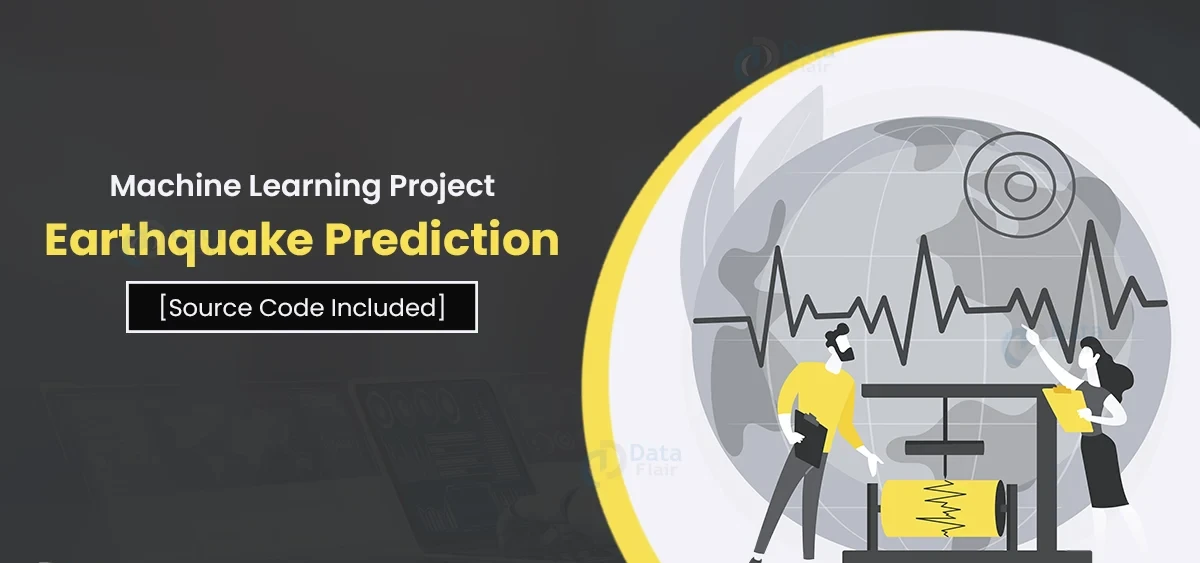

## **Description**: 
**It is well known that if a disaster occurs in one region, it is likely to happen again. Some regions have frequent earthquakes, but this is only a comparative amount compared to other regions.
So, predicting the earthquake with date and time, latitude and longitude from previous data is not a trend that follows like other things, it happens naturally.**

# 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Dataset information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/Earthquake_Prediction_Model/database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df.columns.unique()

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

* **Now let’s see the main characteristics of earthquake data and create an object of these characteristics, namely, date, time, latitude, longitude, depth, magnitude:**

In [ ]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

* **No Null value present**

* **Since the data is random, so we need to scale it based on the model inputs. In this, we convert the given date and time to Unix time which is in seconds and a number. This can be easily used as an entry for the network we have built:**

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(df['Date'], df['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
final_data = df.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


# 3. Data Visualization

* **Now, before we create the earthquake prediction model, let’s visualize the data on a world map that shows a clear representation of where the earthquake frequency will be more:**

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


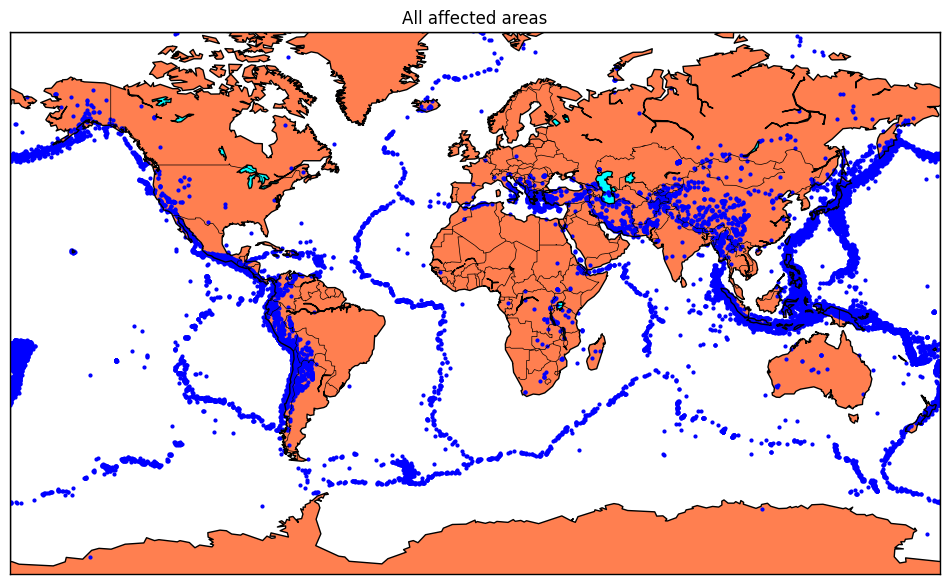

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

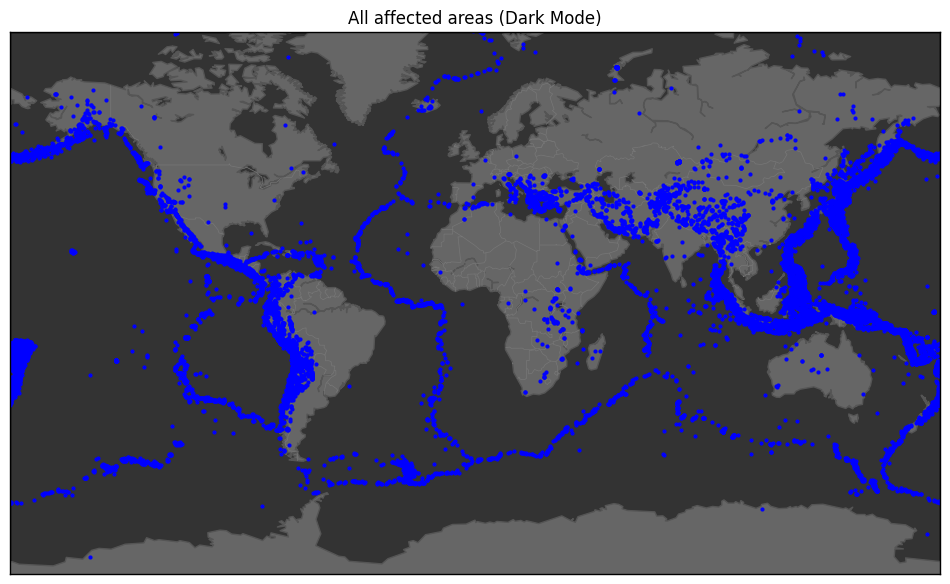

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create Basemap object with projection and limits
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

# Get longitudes and latitudes from DataFrame
longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

# Convert longitudes and latitudes to map coordinates
x,y = m(longitudes,latitudes)

# Create figure and set title
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas (Dark Mode)")

# Set colors for map elements
m.drawcoastlines(color='#555555')
m.drawmapboundary(fill_color='#333333')
m.fillcontinents(color='#666666',lake_color='#333333')
m.drawcountries(color='#777777')

# Plot data points on map
m.plot(x, y, "o", markersize = 2, color = 'blue')

# Show map
plt.show()


# 4. Data Splitting

* **Now, to create the earthquake prediction model, we need to divide the data into Xs and ys which respectively will be entered into the model as inputs to receive the output from the model.**
* **Here the inputs are TImestamp, Latitude and Longitude and the outputs are Magnitude and Depth. I’m going to split the xs and ys into train and test with validation. The training set contains 80% and the test set contains 20%:**

In [ ]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']] #independent 
y = final_data[['Magnitude', 'Depth']] #dependent

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


# 5. Neural Network For Earthquake Prediction

* **Now I will create a neural network to fit the data from the training set. Our neural network will consist of three dense layers each with 16, 16, 2 nodes and reread. Relu and softmax will be used as activation functions:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

* **Now I’m going to define the hyperparameters with two or more options to find the best fit:**

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)


<ipython-input-20-e86ab04a3ebc>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


* **Now we need to find the best fit of the above model and get the mean test score and standard deviation of the best fit model**

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787987 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.213027 (0.394294) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.600000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.787987 (0.394680) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.600271 (0.464062) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


* **In the step below, the best-fit parameters are used for the same model to calculate the score with the training data and the test data:**

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5038 - accuracy: 0.9814 - val_loss: 0.5038 - val_accuracy: 0.9814
Epoch 

# Conclusion:
So we can see in the above output that our neural network model for earthquake prediction performs well. 

# Reference:
*  [Aman Kharwal (Medium.com)](https://amankharwal.medium.com/)
* [Image Resource (Data Flair)](https://data-flair.training/blogs/earthquake-prediction-using-machine-learning/)

# **Thank You**